In [2]:
import os
os.chdir('../')  # Moving up one directory to the root

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from data.data_processing import DataProcessor, TextSignals
from utils.dataVisualizer import DataVisualizer
from models.sentiment_model import ModelTrainer

2024-12-12 11:27:34.569582: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Create instances
dataVisualizer = DataVisualizer()
processor = DataProcessor()
trainer = ModelTrainer() 

In [4]:
df = processor.load_data()

In [5]:
# Analyze ratings distribution
dataVisualizer.analyze_ratings_distribution(df)

# Analyze sentiment distribution on the imbalanced dataset in terms of sentiment
dataVisualizer.analyze_sentiment_distribution(df)


Rating Distribution:
Rating 0: 130,000 reviews (20.0%)
Rating 1: 130,000 reviews (20.0%)
Rating 2: 130,000 reviews (20.0%)
Rating 3: 130,000 reviews (20.0%)
Rating 4: 130,000 reviews (20.0%)

Sentiment Distribution:
Neutral: 260,000
Positive: 130,000
Positive: 260,000


In [6]:
df_balanced = processor.create_balanced_dataset(df)

In [7]:
# Print basic statistics
print(f"Total samples in balanced dataset: {len(df_balanced)}")
print("\nSamples per sentiment:")
print(df_balanced['sentiment'].value_counts().sort_index())

# Analyze special features
processed_texts = [processor.preprocess_text(text)[0] for text in df_balanced['text']]
sarcasm_count = sum('_SARC_' in text for text in processed_texts)
negation_count = sum(any(neg in text.lower() for neg in TextSignals.NEGATION_WORDS) for text in processed_texts)

print(f"\nSpecial features in balanced dataset:")
print(f"Sarcastic samples: {sarcasm_count}")
print(f"Samples with negation: {negation_count}")

Total samples in balanced dataset: 3000

Samples per sentiment:
sentiment
0    1000
1    1000
2    1000
Name: count, dtype: int64

Special features in balanced dataset:
Sarcastic samples: 759
Samples with negation: 2619


In [8]:
# Detailed analysis of both original and processed text
from data.data_processing import TextSignals  # Add this import at the top

original_analysis = {
    'sarcastic': 0,
    'negation': 0,
    'both': 0
}

processed_analysis = {
    'sarcastic': 0,
    'negation': 0,
    'both': 0
}

# Analyze both original and processed text
for text in df_balanced['text']:
    processed_text, is_sarcastic = processor.preprocess_text(text)
    
    # Check original text
    has_negation_orig = any(neg in text.lower() for neg in TextSignals.NEGATION_WORDS)
    if '_SARC_' in text:
        original_analysis['sarcastic'] += 1
    if has_negation_orig:
        original_analysis['negation'] += 1
    if '_SARC_' in text and has_negation_orig:
        original_analysis['both'] += 1
        
    # Check processed text
    has_negation_proc = any(neg in processed_text.lower() for neg in TextSignals.NEGATION_WORDS)
    if '_SARC_' in processed_text:
        processed_analysis['sarcastic'] += 1
    if has_negation_proc:
        processed_analysis['negation'] += 1
    if '_SARC_' in processed_text and has_negation_proc:
        processed_analysis['both'] += 1

print("\nOriginal Text Analysis:")
print(f"Sarcastic samples: {original_analysis['sarcastic']} ({original_analysis['sarcastic']/len(df_balanced)*100:.2f}%)")
print(f"Samples with negation: {original_analysis['negation']} ({original_analysis['negation']/len(df_balanced)*100:.2f}%)")
print(f"Samples with both: {original_analysis['both']} ({original_analysis['both']/len(df_balanced)*100:.2f}%)")

print("\nProcessed Text Analysis:")
print(f"Sarcastic samples: {processed_analysis['sarcastic']} ({processed_analysis['sarcastic']/len(df_balanced)*100:.2f}%)")
print(f"Samples with negation: {processed_analysis['negation']} ({processed_analysis['negation']/len(df_balanced)*100:.2f}%)")
print(f"Samples with both: {processed_analysis['both']} ({processed_analysis['both']/len(df_balanced)*100:.2f}%)")

# Print some examples of detected negations
print("\nExample texts with detected negations:")
for text in df_balanced['text'][:5]:
    processed_text, _ = processor.preprocess_text(text)
    if any(neg in processed_text.lower() for neg in TextSignals.NEGATION_WORDS):
        print(f"\nOriginal: {text}")
        print(f"Processed: {processed_text}")


Original Text Analysis:
Sarcastic samples: 0 (0.00%)
Samples with negation: 2619 (87.30%)
Samples with both: 0 (0.00%)

Processed Text Analysis:
Sarcastic samples: 759 (25.30%)
Samples with negation: 2619 (87.30%)
Samples with both: 733 (24.43%)

Example texts with detected negations:

Original: I probably won't go back unless a friend really wants to go.  It certainly wasn't bad, but definitely not great and for the prices there are better restaurants.  My friend and I got the guacamole app, which was really average.  Then we split the fall salad and chicken carrot pesto sandwich.  The sandwich was good, but the salad was REALLY plain and bland and certainly not worth the $11 price tag.
Processed: i probably will not_NEG go back unless a friend really wants to go. it certainly was not_NEG bad, but definitely not_NEG great and for the prices there are better restaurants. my friend and i got the guacamole app, which was really average. then we split the fall salad and chicken carrot pe

In [9]:
print(f"Total samples: {len(df_balanced)}")
dataVisualizer.analyze_sentiment_distribution(df_balanced)

Total samples: 3000

Sentiment Distribution:
Neutral: 1,000
Positive: 1,000
Positive: 1,000


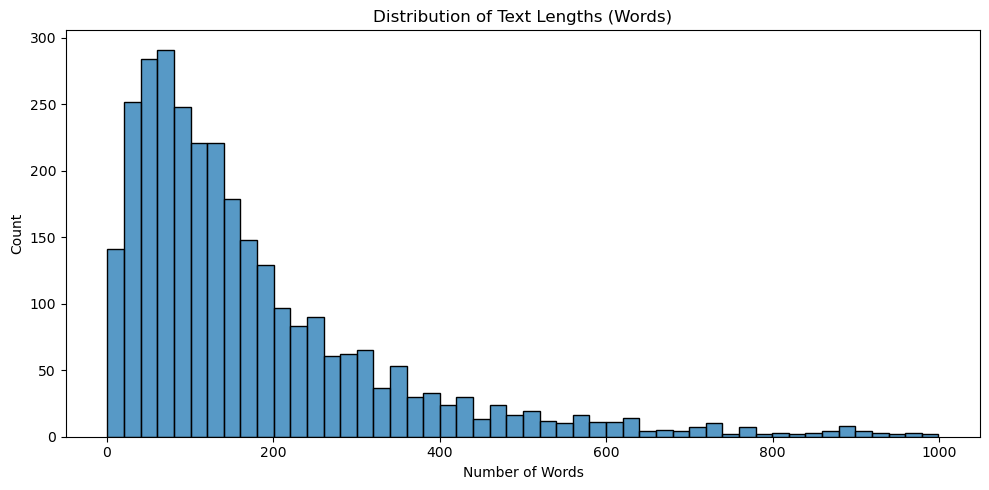


Text Length Statistics:

Word counts:
Average length: 176.0 words
Median length: 126.0 words
Max length: 999 words
Min length: 1 words


In [10]:
dataVisualizer.analyze_text_lengths(df_balanced['text'])

In [11]:
sample_texts = df_balanced['text'].head(5)

print("Detailed preprocessing examples from dataset:\n")
for text in sample_texts:
    processed, is_sarcastic = processor.preprocess_text(text)
    print(f"Original: {text}\n\n")
    print(f"Processed: {processed}\n\n")
    print(f"Sarcastic: {is_sarcastic}\n\n")
    print("-" * 80 + "\n")

Detailed preprocessing examples from dataset:

Original: I probably won't go back unless a friend really wants to go.  It certainly wasn't bad, but definitely not great and for the prices there are better restaurants.  My friend and I got the guacamole app, which was really average.  Then we split the fall salad and chicken carrot pesto sandwich.  The sandwich was good, but the salad was REALLY plain and bland and certainly not worth the $11 price tag.


Processed: i probably will not_NEG go back unless a friend really wants to go. it certainly was not_NEG bad, but definitely not_NEG great and for the prices there are better restaurants. my friend and i got the guacamole app, which was really average. then we split the fall salad and chicken carrot pesto sandwich. the sandwich was good, but the salad was really plain and bland and certainly not_NEG worth the $11 price tag.


Sarcastic: False


--------------------------------------------------------------------------------

Original: T

In [12]:
processed_texts, analysis = processor.process_batch(df['text'])

print("Batch Analysis Statistics:")
print(f"Sarcasm detected: {analysis['sarcasm_count']}")
print(f"Negations found: {analysis['negation_count']}")
print(f"Special tokens: {analysis['special_tokens_count']}")
print(f"URLs found: {analysis['url_count']}")


Batch Analysis Statistics:
Sarcasm detected: 759
Negations found: 538305
Special tokens: 0
URLs found: 8541


In [13]:
print("Data Quality Checks:")
print("\nNull values:")
print(df_balanced.isnull().sum())
print("\nDuplicate rows:", df_balanced.duplicated().sum())

Data Quality Checks:

Null values:
label        0
text         0
sentiment    0
dtype: int64

Duplicate rows: 0


Token Length Statistics:
Mean: 163.9
Median: 169.0
95th percentile: 256.0
Max: 256


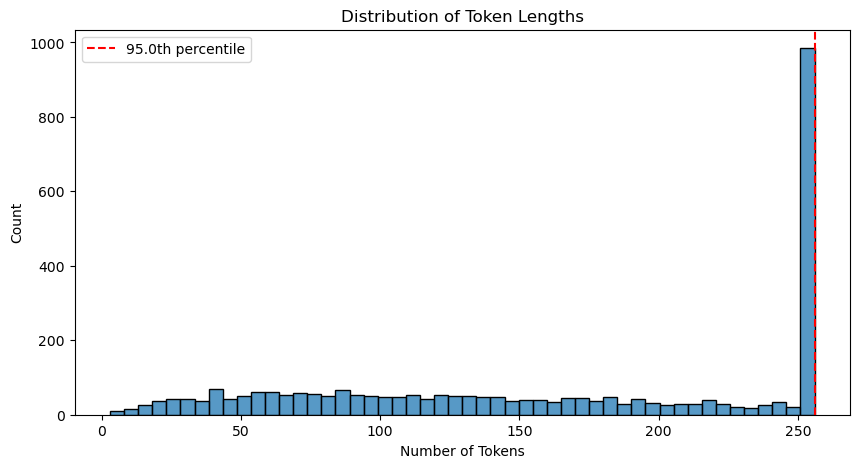


Recommended MAX_LENGTH: 256


In [14]:
# Get tokenized dataset from ModelTrainer
encoded_data = trainer.prepare_dataset(df_balanced['text'])

# Analyze token lengths
suggested_length = dataVisualizer.analyze_token_lengths(encoded_data)
MAX_LENGTH = min(512, (suggested_length + 15) // 16 * 16)
print(f"\nRecommended MAX_LENGTH: {MAX_LENGTH}")

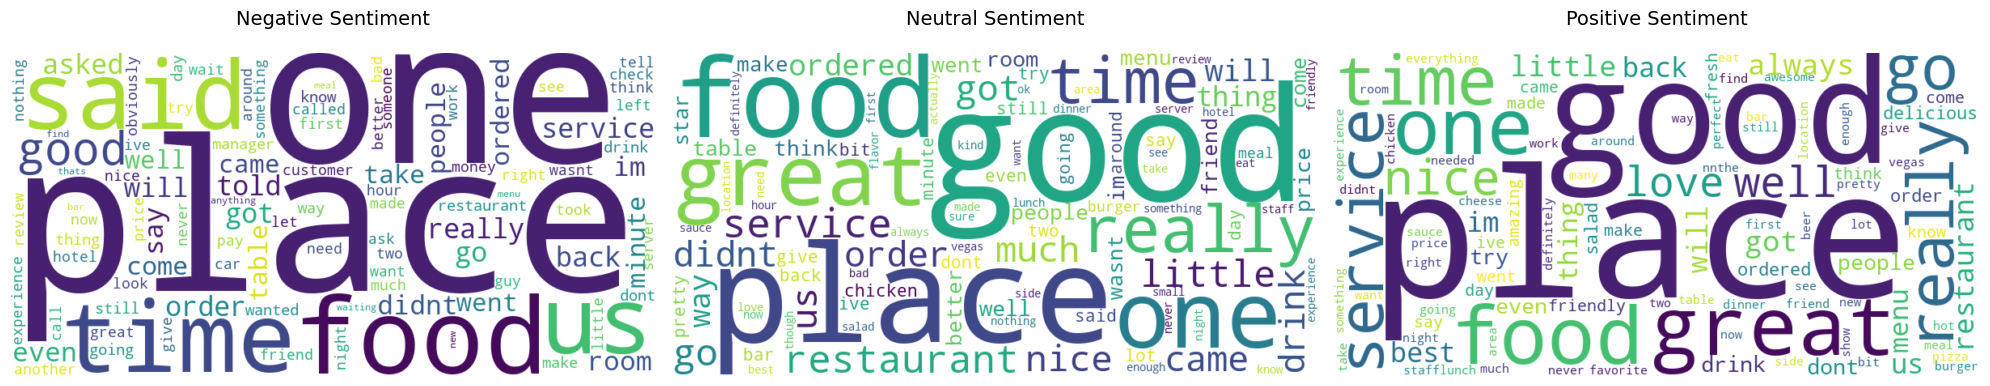


Most Common Words by Sentiment:

Negative:
  the: 11234
  and: 7225
  to: 6735
  was: 4293
  of: 3225
  it: 3071
  in: 2635
  that: 2634
  for: 2608
  my: 2397

Neutral:
  the: 8067
  and: 4707
  to: 3623
  was: 2896
  of: 2469
  it: 2236
  for: 1949
  is: 1748
  in: 1693
  but: 1651

Positive:
  the: 6631
  and: 4724
  to: 3029
  was: 2235
  of: 2096
  is: 1770
  it: 1708
  for: 1570
  in: 1546
  with: 1215


In [15]:
dataVisualizer.visualize_wordclouds(df_balanced)

In [16]:
DataVisualizer.display_processed_reviews(df_balanced) 


Review #1801

Original Text:
Definitely good and unique food.  Not sure if it's to die for, but definitely worth eating every now and again!

Processed Text:
definitely good and unique food. not_NEG sure if it is to die for, but definitely worth eating every now and again!

Labels:
- Sentiment: 2 (Positive)
- Sarcasm Detected: False
- Contains Negation: False
- Polarity Score: 0.70

Review #1190

Original Text:
Upon booking the Tropicana for a recent trip to Vegas, I scoured Yelp and Trip Advisor for reviews. I have to say, most of them are dead on so I wasn't hit with any big surprises when we arrived. I em...

Processed Text:
upon booking the tropicana for a recent trip to vegas, i scoured yelp and trip advisor for reviews. i have to say, most of them are dead on so i was not_NEG hit with any big surprises when we arrived....

Labels:
- Sentiment: 2 (Positive)
- Sarcasm Detected: True
- Contains Negation: False
- Polarity Score: 0.70

Review #1817

Original Text:
Any savy smart trav

Processing texts... This may take a while...



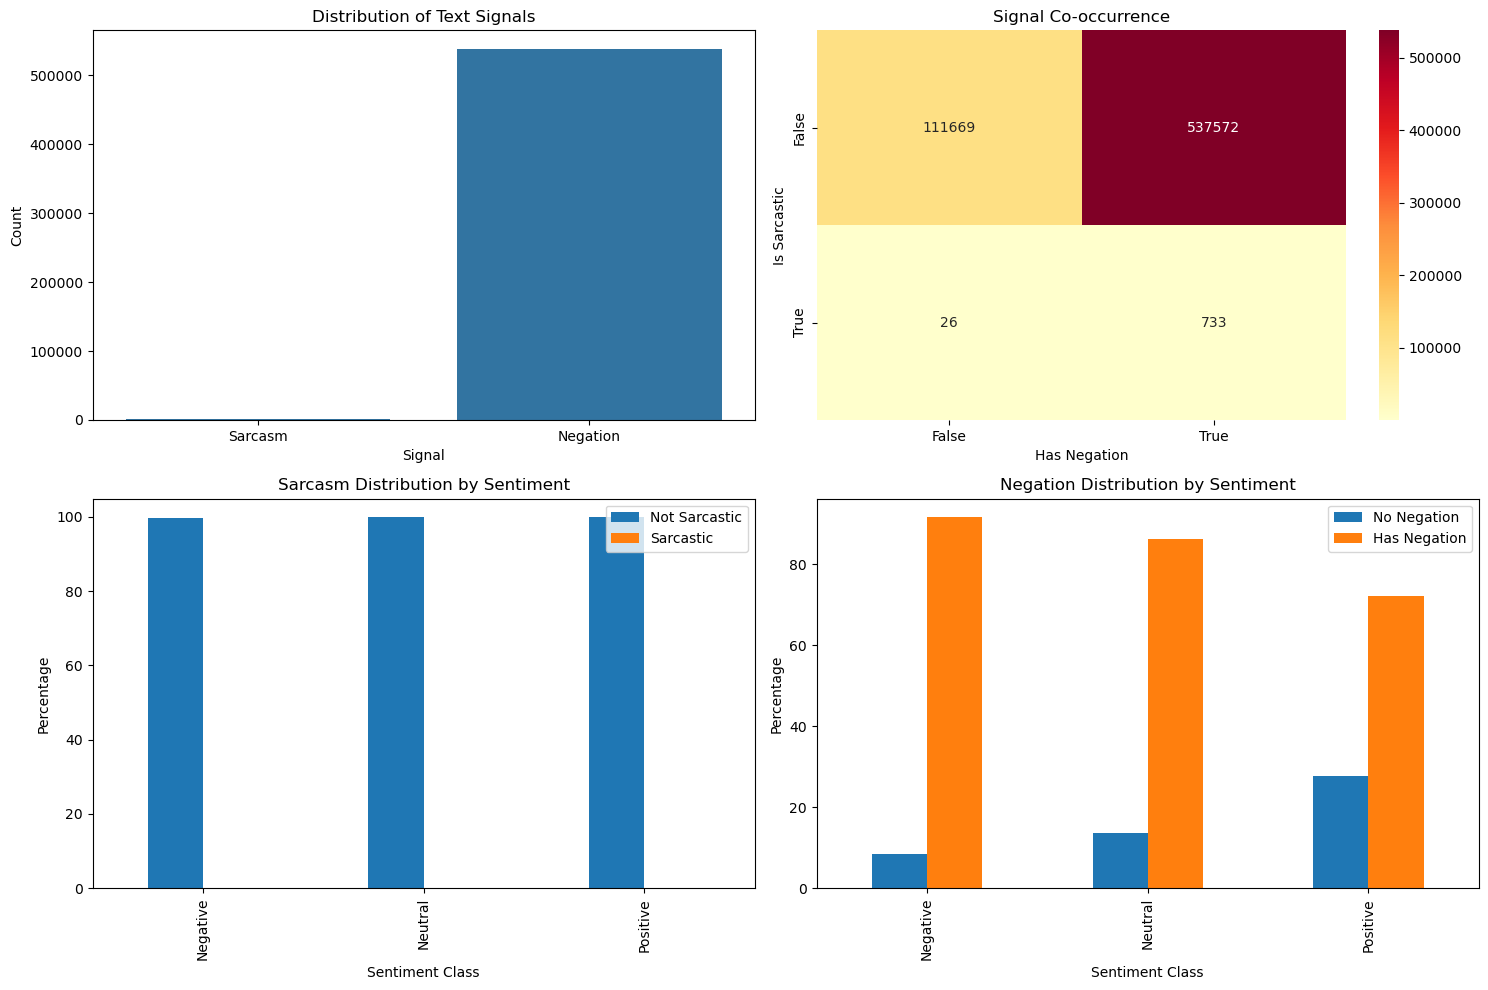


=== Text Signal Analysis ===
Total Reviews Analyzed: 650,000

Sarcasm Detection:
- Reviews with sarcasm: 759 (0.12%)
- Reviews without sarcasm: 649,241 (99.88%)

Negation Analysis:
- Reviews with negation: 538,305 (82.82%)
- Reviews without negation: 111,695 (17.18%)

Signal Co-occurrence:
has_negation   False   True 
sarcastic                   
False         111669  537572
True              26     733

Distribution across Sentiment Classes:

Counts for each combination (sentiment, sarcasm, negation):
sarcastic     False         True       
has_negation  False   True  False True 
sentiment                              
0             21663  237872    10   455
1             17724  112158     0   118
2             72282  187542    16   160
Processing texts... This may take a while...



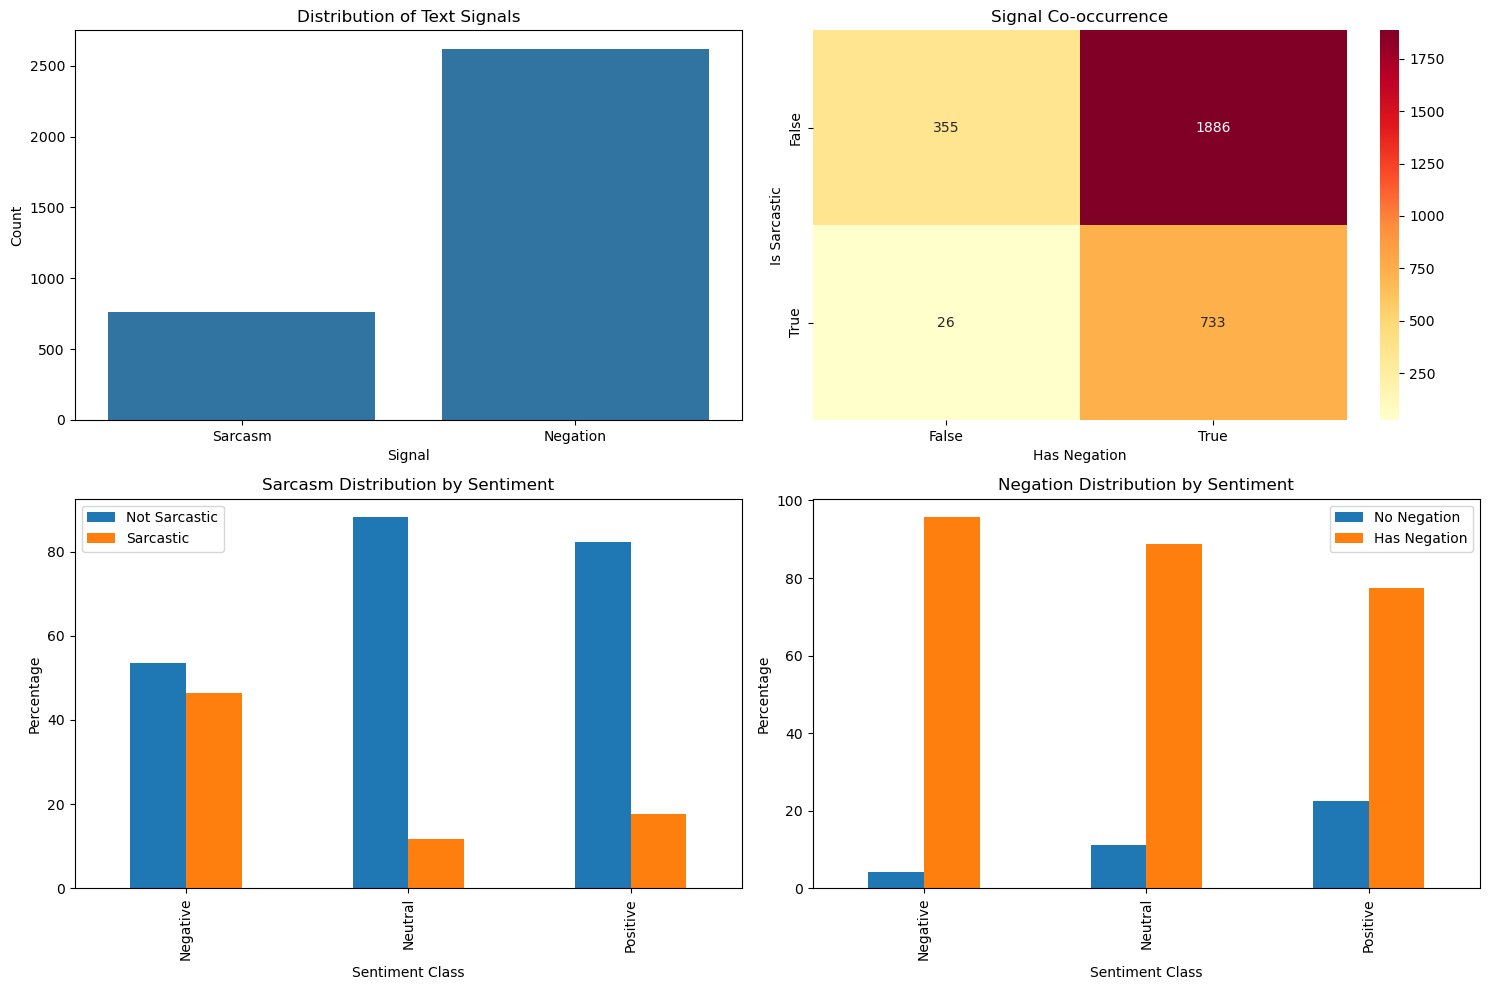


=== Text Signal Analysis ===
Total Reviews Analyzed: 3,000

Sarcasm Detection:
- Reviews with sarcasm: 759 (25.30%)
- Reviews without sarcasm: 2,241 (74.70%)

Negation Analysis:
- Reviews with negation: 2,619 (87.30%)
- Reviews without negation: 381 (12.70%)

Signal Co-occurrence:
has_negation  False  True 
sarcastic                 
False           355   1886
True             26    733

Distribution across Sentiment Classes:

Counts for each combination (sentiment, sarcasm, negation):
sarcastic    False       True       
has_negation False True  False True 
sentiment                           
0               33   502    10   455
1              112   770     0   118
2              210   614    16   160


In [17]:
# For the full dataset
dataVisualizer.analyze_text_signals(df)

# for the balanced dataset
dataVisualizer.analyze_text_signals(df_balanced)


Analyzing Original Dataset:

Original Dataset Composition
Total samples: 650,000

Feature Distribution:
- Sarcastic samples: 0 (0.00%)
- Negation samples: 538,326 (82.82%)
- Samples with both features: 0 (0.00%)


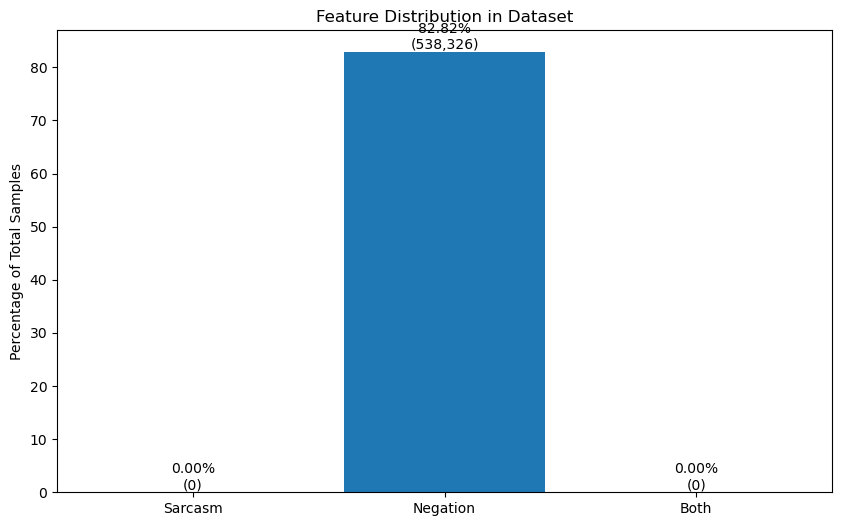


Analyzing Balanced Dataset:

Balanced Dataset Composition
Total samples: 3,000

Feature Distribution:
- Sarcastic samples: 0 (0.00%)
- Negation samples: 2,619 (87.30%)
- Samples with both features: 0 (0.00%)


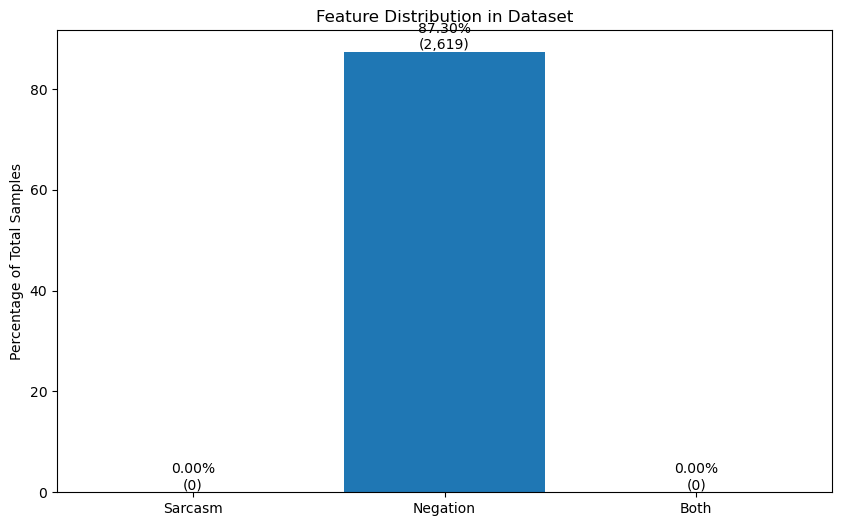

In [18]:
def analyze_dataset_composition(texts, title="Dataset Composition Analysis"):
    """
    Analyze the composition of special features in the dataset
    """
    # Calculate counts
    sarcasm_count = sum('_SARC_' in str(text) for text in texts)
    negation_count = sum(
        any(neg in str(text).lower() for neg in TextSignals.NEGATION_WORDS) 
        for text in texts
    )
    total = len(texts)
    
    # Create a more detailed analysis by sentiment
    sentiment_analysis = pd.DataFrame({
        'text': texts,
        'has_sarcasm': [('_SARC_' in str(text)) for text in texts],
        'has_negation': [
            any(neg in str(text).lower() for neg in TextSignals.NEGATION_WORDS) 
            for text in texts
        ]
    })
    
    # Print analysis
    print(f"\n{title}")
    print("=" * len(title))
    print(f"Total samples: {total:,}")
    print(f"\nFeature Distribution:")
    print(f"- Sarcastic samples: {sarcasm_count:,} ({sarcasm_count/total*100:.2f}%)")
    print(f"- Negation samples: {negation_count:,} ({negation_count/total*100:.2f}%)")
    
    # Feature co-occurrence
    both_features = sum(
        sentiment_analysis['has_sarcasm'] & 
        sentiment_analysis['has_negation']
    )
    print(f"- Samples with both features: {both_features:,} ({both_features/total*100:.2f}%)")
    
    # Visualize distribution
    plt.figure(figsize=(10, 6))
    
    # Create bar data
    features = ['Sarcasm', 'Negation', 'Both']
    counts = [sarcasm_count, negation_count, both_features]
    percentages = [count/total*100 for count in counts]
    
    # Plot bars
    bars = plt.bar(features, percentages)
    
    # Customize plot
    plt.title('Feature Distribution in Dataset')
    plt.ylabel('Percentage of Total Samples')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%\n({int(height*total/100):,})',
                ha='center', va='bottom')
    
    plt.show()

# Add this after your existing cells
print("\nAnalyzing Original Dataset:")
analyze_dataset_composition(df['text'], "Original Dataset Composition")

print("\nAnalyzing Balanced Dataset:")
analyze_dataset_composition(df_balanced['text'], "Balanced Dataset Composition")

In [19]:
# Print more examples of detected negations with sentiment labels
print("\nDetailed Examples of Detected Negations:")
sample_size = 10  # Increase number of examples
samples = df_balanced.sample(n=sample_size, random_state=42)  # Random sampling

for _, row in samples.iterrows():
    text = row['text']
    sentiment = row['sentiment']
    processed_text, _ = processor.preprocess_text(text)
    
    # Map sentiment to label
    sentiment_label = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}[sentiment]
    
    # Find all negation words in the text
    negation_words_found = [word for word in text.lower().split() 
                           if word.strip('.,!?') in TextSignals.NEGATION_WORDS]
    
    print(f"\n{'='*80}")
    print(f"Sentiment: {sentiment_label}")
    print(f"Negation words found: {negation_words_found}")
    print(f"\nOriginal: {text[:200]}...")  # Show first 200 chars for brevity
    print(f"\nProcessed: {processed_text[:200]}...")
    print(f"{'='*80}")


Detailed Examples of Detected Negations:

Sentiment: Positive
Negation words found: ['not']

Original: Definitely good and unique food.  Not sure if it's to die for, but definitely worth eating every now and again!...

Processed: definitely good and unique food. not_NEG sure if it is to die for, but definitely worth eating every now and again!...

Sentiment: Positive
Negation words found: ['no', 'no', 'not', 'no', 'not', 'nor', 'no']

Original: Upon booking the Tropicana for a recent trip to Vegas, I scoured Yelp and Trip Advisor for reviews. I have to say, most of them are dead on so I wasn't hit with any big surprises when we arrived. I em...

Processed: upon booking the tropicana for a recent trip to vegas, i scoured yelp and trip advisor for reviews. i have to say, most of them are dead on so i was not_NEG hit with any big surprises when we arrived....

Sentiment: Positive
Negation words found: []

Original: Any savy smart travel girls' new hot spot!  I stopped into Vegas' XpresSp